In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [36]:
titanic_data=pd.read_csv('train.csv')

In [37]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [38]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [39]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [40]:
titanic_data=titanic_data.drop(columns='Cabin',axis=1)

In [41]:
titanic_data['Age'].fillna(titanic_data['Age'].mean(), inplace=True)

In [42]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [43]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [44]:
print(titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [45]:
print(titanic_data['Embarked'].mode()[0])

S


In [46]:
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0],inplace=True)

In [47]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [48]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [49]:
titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

<Axes: ylabel='count'>

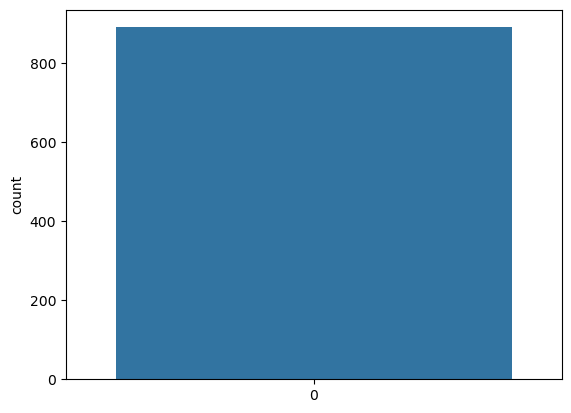

In [51]:
sns.countplot(titanic_data['Survived'])

In [52]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

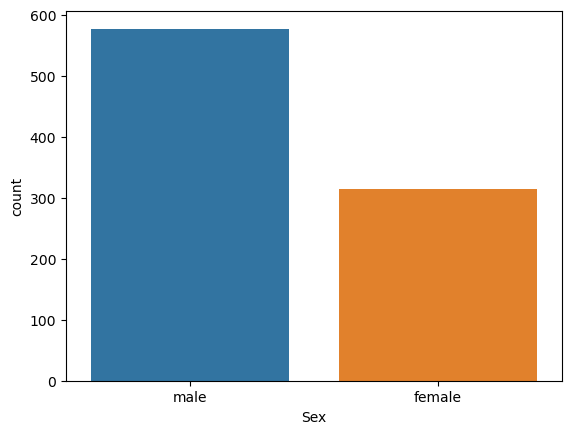

In [53]:
sns.countplot(x='Sex', data=titanic_data)

<Axes: xlabel='Sex', ylabel='count'>

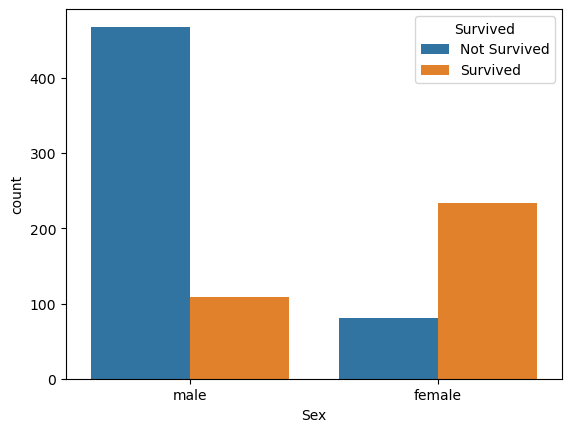

In [54]:
titanic_data['Survived'] = titanic_data['Survived'].map({0: 'Not Survived', 1: 'Survived'})
sns.countplot(x='Sex', hue='Survived', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

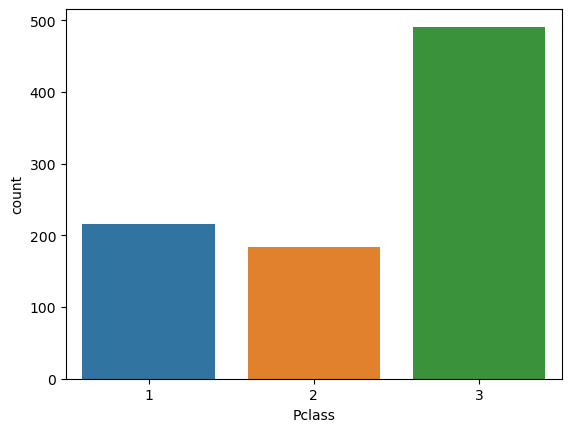

In [55]:
sns.countplot(x='Pclass', data=titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

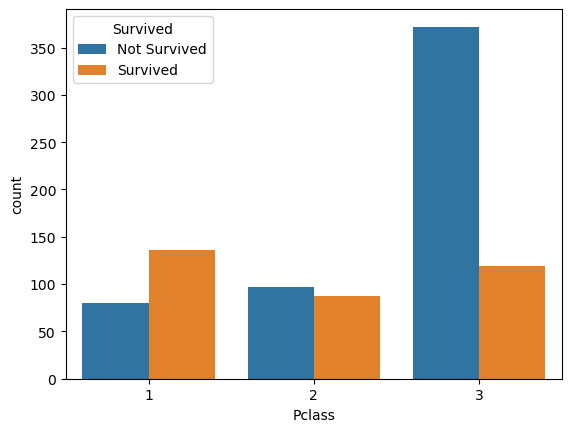

In [56]:
sns.countplot(x='Pclass',hue='Survived',data=titanic_data)

In [57]:
titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [58]:
titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [59]:
X = titanic_data.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'])
Y = titanic_data['Survived']
print(X)

     Pclass     Sex        Age  SibSp  Parch     Fare Embarked
0         3    male  22.000000      1      0   7.2500        S
1         1  female  38.000000      1      0  71.2833        C
2         3  female  26.000000      0      0   7.9250        S
3         1  female  35.000000      1      0  53.1000        S
4         3    male  35.000000      0      0   8.0500        S
..      ...     ...        ...    ...    ...      ...      ...
886       2    male  27.000000      0      0  13.0000        S
887       1  female  19.000000      0      0  30.0000        S
888       3  female  29.699118      1      2  23.4500        S
889       1    male  26.000000      0      0  30.0000        C
890       3    male  32.000000      0      0   7.7500        Q

[891 rows x 7 columns]


In [60]:
print(Y)

0      Not Survived
1          Survived
2          Survived
3          Survived
4      Not Survived
           ...     
886    Not Survived
887        Survived
888    Not Survived
889        Survived
890    Not Survived
Name: Survived, Length: 891, dtype: object


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2,random_state=2)
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


In [87]:
print(X_train.columns)
print(X_train.head())

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')
     Pclass     Sex   Age  SibSp  Parch     Fare  Embarked_C  Embarked_Q  \
30        1    male  40.0      0      0  27.7208        True       False   
10        3  female   4.0      1      1  16.7000       False       False   
873       3    male  47.0      0      0   9.0000       False       False   
182       3    male   9.0      4      2  31.3875       False       False   
876       3    male  20.0      0      0   9.8458       False       False   

     Embarked_S  
30        False  
10         True  
873        True  
182        True  
876        True  


In [88]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Assuming X_train contains the features and Y_train contains the target variable
# Drop the original 'Sex' column as it has already been one-hot encoded
X_train.drop('Sex', axis=1, inplace=True)

# Standardize the features for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, Y_train)


LogisticRegression()

In [99]:
X_train_prediction = model.predict(X_train)
print(X_train_prediction)

['Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived' 'Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived' 'Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived' 'Survived'
 'Not Survived' 'Not Survived' 'Survived' 'Survived' 'Not Survived'
 'Survived' 'Not Surviv

C:\Users\Ram\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [101]:
from sklearn.metrics import accuracy_score
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy score of training data:', training_data_accuracy)

Accuracy score of training data: 0.6896067415730337


In [109]:
# Assuming X_test contains the test features
# One-hot encode the categorical variables in X_test
X_test_encoded = pd.get_dummies(X_test, columns=['Sex', 'Embarked'])

# Make sure the test data has the same columns as the training data after one-hot encoding
# This ensures that both datasets have the same features
X_test_encoded = X_test_encoded.reindex(columns=X_train.columns, fill_value=0)

# Make predictions using the pre-trained model
X_test_prediction = model.predict(X_test_encoded)

# Print the predictions
print(X_test_prediction)


['Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived' 'Survived'
 'Not Survived' 'Not Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Survived' 'Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived' 'Survived'
 'Not Survived' 'Not Survived' 'Not Survived' 'Not Survived'
 'Not Survived' 'Not Surviv

C:\Users\Ram\anaconda3\Lib\site-packages\sklearn\base.py:432: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [110]:
from sklearn.metrics import accuracy_score
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy score of test data:', test_data_accuracy)

Accuracy score of test data: 0.6256983240223464


In [107]:
import joblib
joblib.dump(model,'logistic_regression.pkl')

['logistic_regression.pkl']

In [ ]:
!pip install pyngrok
import subprocess
import os
from pyngrok import ngrok
ngrok.set_auth_token("2eEb9TynFBtFyGtMJf7XZ4YzEY8_3KA68koevS5adXG6t7ZdC")
os.system("nohup python -m flask run--no-reload &")
proc = subprocess.Popen(["ngrok", "http", "5000"])
public_url=ngrok.connect(addr="5000",proto="http")
print("public url",public_url)

In [ ]:
from flask import Flask, request, jsonify
import joblib
from pyngrok import ngrok
from IPython.display import display, HTML

# Load the trained model
model = joblib.load('logistic_regression.pkl')

app = Flask(__name__)

@app.route('/')
def home():
    # HTML form to take inputs
    html_form = """
    <!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <title>Titanic Survival Prediction</title>
    <style>
        body {
            background-color: black;
            color: white;
            font-family: Arial, sans-serif;
            text-align: center;
            padding: 20px;
        }
        #predictionForm {
            display: inline-block;
            text-align: left;
        }
        img {
            max-width: 100%;
            height: auto;
        }
    </style>
</head>
<body>
    <h2>Titanic Survival Prediction</h2>
    <form id="predictionForm" method="post" action="/predict">
        <label for="pclass">Pclass:</label>
        <input type="text" id="pclass" name="pclass"><br><br>

        <label for="sex">Sex (0 for male, 1 for female):</label>
        <input type="text" id="sex" name="sex"><br><br>

        <label for="age">Age:</label>
        <input type="text" id="age" name="age"><br><br>

        <label for="sibsp">SibSp:</label>
        <input type="text" id="sibsp" name="sibsp"><br><br>

        <label for="parch">Parch:</label>
        <input type="text" id="parch" name="parch"><br><br>

        <label for="fare">Fare:</label>
        <input type="text" id="fare" name="fare"><br><br>

        <label for="embarked">Embarked (0 for S, 1 for C, 2 for Q):</label>
        <input type="text" id="embarked" name="embarked"><br><br>

        <button type="button" onclick="predictSurvival()">Predict</button>
    </form>

    <p id="predictionResult"></p>

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/800px-RMS_Titanic_3.jpg" alt="Titanic Image">

    <script>
        function predictSurvival() {
            var xhr = new XMLHttpRequest();
            var url = "/predict";
            var data = new FormData(document.getElementById("predictionForm")); // Changed to FormData

            xhr.open("POST", url, true);
            xhr.onreadystatechange = function () {
                if (xhr.readyState === 4 && xhr.status === 200) {
                    var response = JSON.parse(xhr.responseText);
                    document.getElementById("predictionResult").innerHTML = "Survival Prediction: " + response.prediction;
                }
            };
            xhr.send(data);
        }
    </script>
</body>
</html>

    """
    return html_form

@app.route('/predict', methods=['POST'])
def predict():
    # Access form data
    pclass = request.form['pclass']
    sex = request.form['sex']
    age = request.form['age']
    sibsp = request.form['sibsp']
    parch = request.form['parch']
    fare = request.form['fare']
    embarked = request.form['embarked']

    # Convert data to appropriate types
    pclass = int(pclass)
    sex = int(sex)
    age = float(age)
    sibsp = int(sibsp)
    parch = int(parch)
    fare = float(fare)
    embarked = int(embarked)

    # Make prediction
    features = [[pclass, sex, age, sibsp, parch, fare, embarked]]
    prediction = model.predict(features)[0]

    return jsonify({'prediction': int(prediction)})

def run_flask_app():
    # Run Flask app on port 5000
    app.run(host='127.0.0.1', port=5000, debug=True, use_reloader=False)

# Start ngrok tunnel
public_url = ngrok.connect(addr="5000", proto="http")
print("Public URL:", public_url)

# Display ngrok tunnel URL
display(HTML(f"<h2>Open this link in your browser to access the application:</h2><p>{public_url}</p>"))

try:
    # Keep the Flask app running
    run_flask_app()
except KeyboardInterrupt:
    # Shutdown ngrok and Flask app
    ngrok.kill()


Public URL: NgrokTunnel: "https://0f59-2409-40f0-1039-469-135-79a9-2784-e317.ngrok-free.app" -> "http://localhost:5000"


 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
